# Libraries to include

In [1]:
%run functions_new.ipynb

# Load the files 

Text(0.5, 1.0, 'Histogram of labels after processing participant: 6')

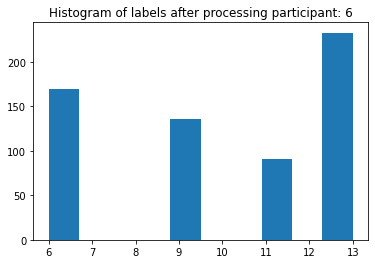

In [2]:
label = []
feature_matrix = []
n_participants = 15


for par_num in range (1,n_participants+1):

    x = fileload ('python_Single_Subject_FS_P' + str(par_num) + '.mat',1)
    feats = fileload('feat_names.mat',5)
    feature_matrix1 = np.vstack ((x))
    
    # Creating the label matrix
    X = feature_matrix1 [:,0:-1]
    Y = feature_matrix1 [:,-1]

    # Pre post labels
    label1 = Y 

    # New feature matrix
    feature_matrix1 = X
    
    # Combining all of the features
    label.append (label1)
    feature_matrix.append(feature_matrix1)

# Histogram of Y
par_num = 6
plt.figure()
plt.hist(label[par_num])
plt.title ("Histogram of labels after processing participant: %d" %par_num)


# FT matrix set-up

In [3]:
n_samples_per_par1 = [0]*n_participants

for i in range (0,n_participants):
    print ("FT matrix of P:%d "%(i+1), feature_matrix[i].shape)
    n_samples_per_par1[i] = int (feature_matrix[i].shape[0])
n_samples_per_par = np.cumsum (n_samples_per_par1)
n_samples_per_par = np.insert (n_samples_per_par,0,0)

print ('Array of subject indicies:', n_samples_per_par)

FT matrix of P:1  (506, 21)
FT matrix of P:2  (582, 21)
FT matrix of P:3  (449, 21)
FT matrix of P:4  (689, 21)
FT matrix of P:5  (598, 21)
FT matrix of P:6  (583, 21)
FT matrix of P:7  (630, 21)
FT matrix of P:8  (613, 21)
FT matrix of P:9  (431, 21)
FT matrix of P:10  (591, 21)
FT matrix of P:11  (669, 21)
FT matrix of P:12  (480, 21)
FT matrix of P:13  (612, 21)
FT matrix of P:14  (525, 21)
FT matrix of P:15  (523, 21)
Array of subject indicies: [   0  506 1088 1537 2226 2824 3407 4037 4650 5081 5672 6341 6821 7433
 7958 8481]


# Setting up feature matrix

In [4]:
# Stack the feature matrix to call 

hold1 = np.vstack ((feature_matrix))

n_row = hold1.shape[0]
n_col = hold1.shape[1]

ft_stacked = np.zeros ((n_row,n_col+1))

# Feature matrix in X

ft_stacked [:,0:n_col] = hold1
X = ft_stacked [:,0:-1]

## Clustering of labels
1. Binary of above and below cutoff value
2. Cut-off of 0-10, 10-20, 20-30
3. k means unsupervised clustering to create labels

Text(0.5, 0, 'MI Score')

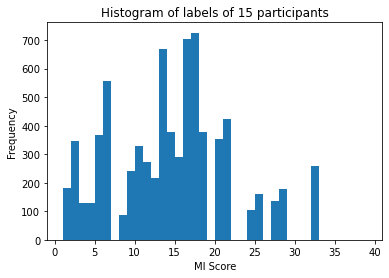

In [5]:
# Histogram presentation

data = np.concatenate(label).ravel()

plt.hist(data, bins=np.arange(1,40))
plt.title ("Histogram of labels of %d participants" %n_participants)
plt.ylabel ('Frequency')
plt.xlabel ('MI Score')

# plt.hist (data)
# plt.title ("Histogram of labels of %d participants" %n_participants)
# plt.ylabel ('Frequency')
# plt.xlabel ('MI Score')

Length of Cluster 1: 2961 Cluster 2: 4081 Cluster 3: 1439


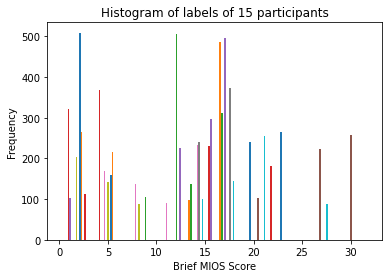

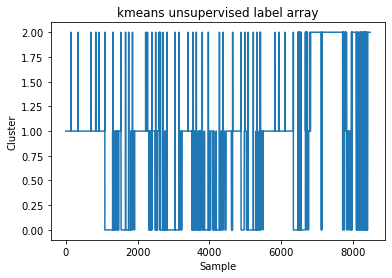

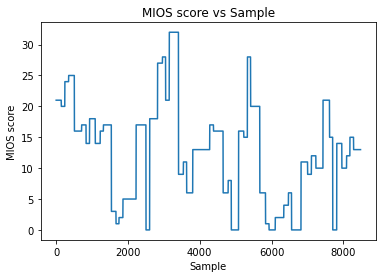

In [6]:
choice = 3

if (choice == 1):
    cutoff_binary=16
    hold2 = cluster_binary(label, n_participants, cutoff_binary)

elif (choice == 2):
    cutoff_clusters = [10,20]
    hold2 = cluster_arbitrary_3 (label, n_participants, cutoff_clusters)
    
elif (choice == 3):
    hold2 = kmeans_cluster_label(X,label,3)

# Plotting actual label vs samples
plt.figure ()
plt.plot (np.hstack ((label)))
plt.title ('MIOS score vs Sample')
plt.xlabel ('Sample')
plt.ylabel ('MIOS score')

# Label matrix in Y
ft_stacked [:,-1] = hold2
Y = ft_stacked [:,-1]

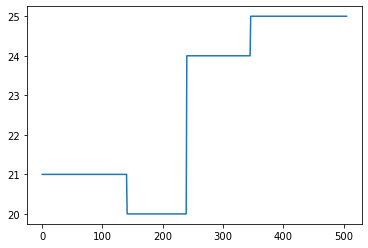

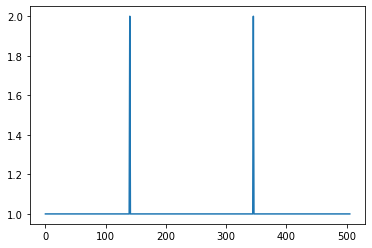

In [7]:
plt.figure()
plt.plot (label[0])
plt.figure()
plt.plot (Y[0:len(label[0])])

## K means elbow to determine the most optimal K cluster

- Seems to be k=2,3,4
- https://www.geeksforgeeks.org/elbow-method-for-optimal-value-of-k-in-kmeans/

1 : 0.763020401147302
2 : 0.6326942925520852
3 : 0.5796500522389834
4 : 0.5454483326640107
5 : 0.5231985481530391
6 : 0.5153993754019548
7 : 0.4960075065352163


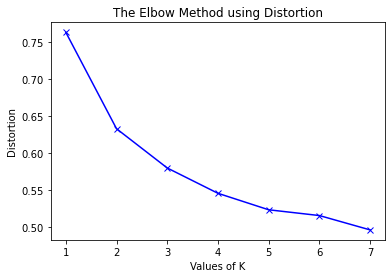

1 : 5693.27344574573
2 : 3995.918293643208
3 : 3425.6434277344083
4 : 3064.958574366533
5 : 2821.4646036857735
6 : 2601.691266057531
7 : 2411.9992125770286


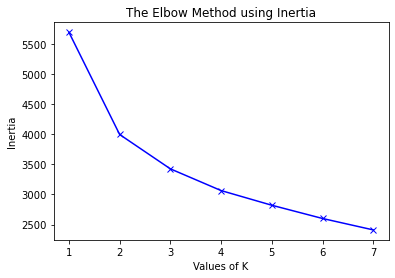

In [8]:
kmeans_elbow (X)

# Difference values between the k values 

In [9]:
distortion_diff = [0.7630,0.6327,0.5797,0.5454,0.5232,0.5154, 0.4953]
print(np.diff (distortion_diff)*100)

inertia_diff = [5693.27,3995.92,3425.64,3064.95,2821.46,2601.52,2434.92]
print (np.diff (inertia_diff)/100)

[-13.03  -5.3   -3.43  -2.22  -0.78  -2.01]
[-16.9735  -5.7028  -3.6069  -2.4349  -2.1994  -1.666 ]


# Validation of SSA through analysis of one user
- See function for more detail

In [10]:
# validation (n_samples_per_par, X, Y,ft_stacked)

# Classification of all

Text(0, 0.5, 'Frequency')

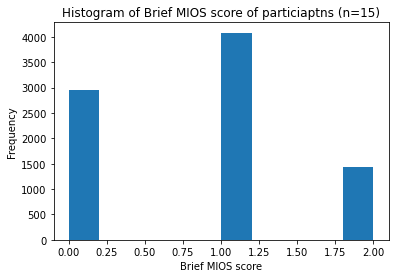

In [11]:
plt.hist(Y)
plt.xlabel("Brief MIOS score")
plt.title("Histogram of Brief MIOS score of particiaptns (n=15)")
plt.ylabel ("Frequency")

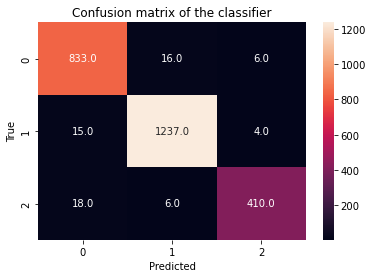

The accuracy of DT is 97.445972%
Precision/Recall/F1/Support:
(0.9735366849209538, 0.9679473593808048, 0.9706423342976757, None)
Participant: 6 
Total samples available: 8481            
Number of training samples: 5936 
Number of testing samples: 2545 



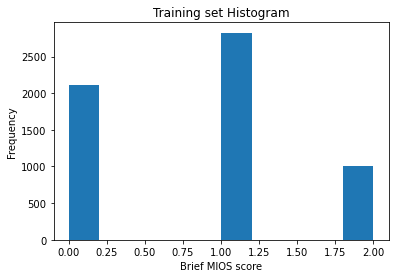

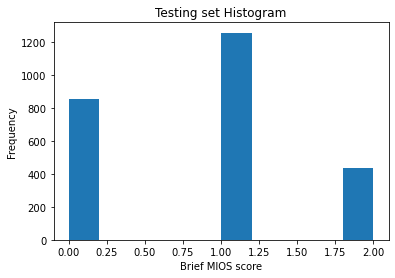

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, shuffle=True, random_state=60)

DT_prediction (X_train, y_train, X_test,y_test)

histo_labels (par_num,ft_stacked,y_train,y_test)

In [13]:
# DT 
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import balanced_accuracy_score

clf = DecisionTreeClassifier(class_weight='balanced', ccp_alpha=0.0) 
clf.fit(X_train, y_train) # Create DT model based on default setting
y_pred = clf.predict (X_test) # DT prediction for test values

print (f1_score(y_test, y_pred, average='macro'))
print (precision_score(y_test, y_pred, average='macro'))
print (recall_score (y_test, y_pred, average='macro')) # Sensitivity
print (balanced_accuracy_score(y_test, y_pred)) #specificity 


0.9709625937534452
0.9737644373008304
0.9683255449881925
0.9683255449881925


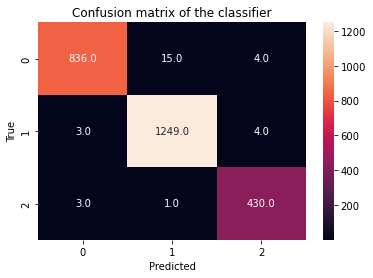

The accuracy of SVM is 98.821218%
Precision/Recall/F1/Support:
(0.9873203492457119, 0.9876626465027943, 0.9874610961925616, None)
Participant: 6 
Total samples available: 8481            
Number of training samples: 5936 
Number of testing samples: 2545 



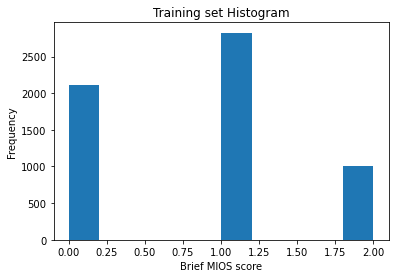

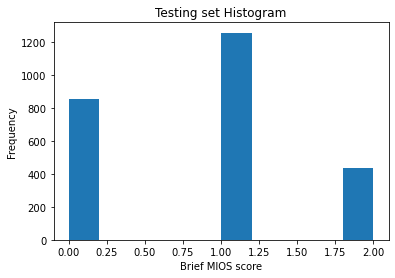

In [14]:
SVM_prediction (X_train, y_train, X_test,y_test)

histo_labels (par_num,ft_stacked,y_train,y_test)

In [15]:
# SVM 
from sklearn.metrics import f1_score
from sklearn.metrics import balanced_accuracy_score

clf = SVC(gamma='scale', class_weight='balanced')
clf.fit(X_train, y_train) # Create SVM model based on default settings
y_pred = clf.predict (X_test) # SVM prediction for test values

print (f1_score(y_test, y_pred, average='macro'))
print (precision_score(y_test, y_pred, average='macro'))
print (recall_score (y_test, y_pred, average='macro')) # Sensitivity
print (balanced_accuracy_score(y_test, y_pred)) #specificity 


0.9874610961925616
0.9873203492457119
0.9876626465027943
0.9876626465027943


In [16]:
confusion_matrix(y_test, y_pred)

array([[ 836,   15,    4],
       [   3, 1249,    4],
       [   3,    1,  430]])

# Cross validation - LOSO

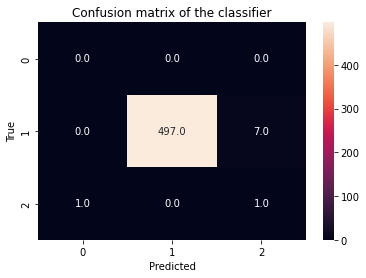

The accuracy of DT is 98.418972%
Precision/Recall/F1/Support:
(0.375, 0.4953703703703704, 0.3976689976689977, None)
Participant: 1 
Total samples available: 8481            
Number of training samples: 7974 
Number of testing samples: 506 



/opt/homebrew/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


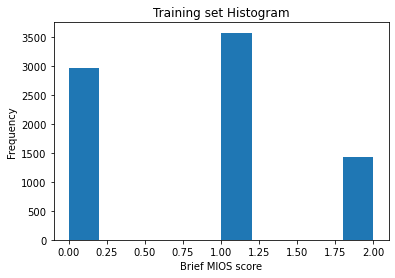

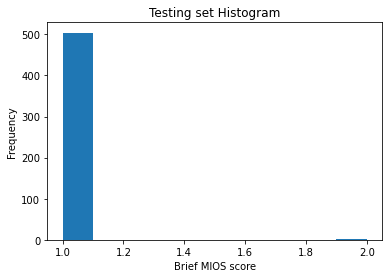

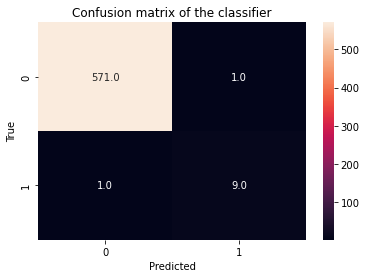

The accuracy of DT is 99.656357%
Precision/Recall/F1/Support:
(0.9491258741258741, 0.9491258741258741, 0.9491258741258741, None)
Participant: 2 
Total samples available: 8481            
Number of training samples: 7898 
Number of testing samples: 582 



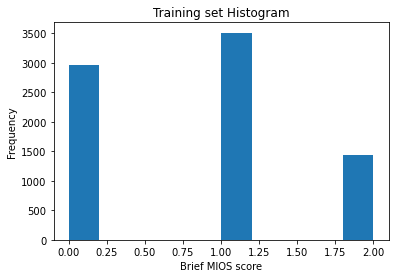

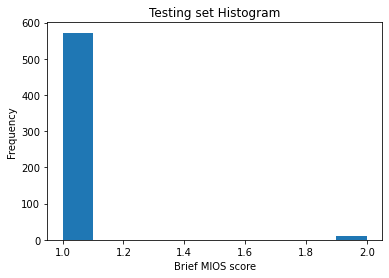

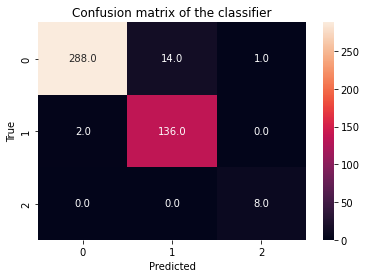

The accuracy of DT is 96.213808%
Precision/Recall/F1/Support:
(0.9295530012771391, 0.9786674319605874, 0.9523177080463064, None)
Participant: 3 
Total samples available: 8481            
Number of training samples: 8031 
Number of testing samples: 449 



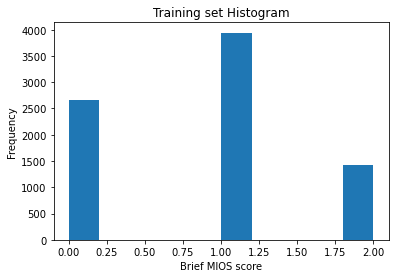

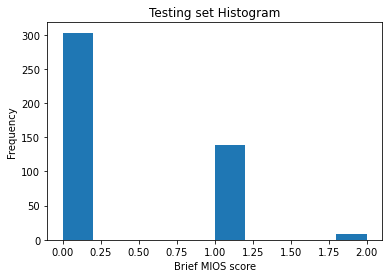

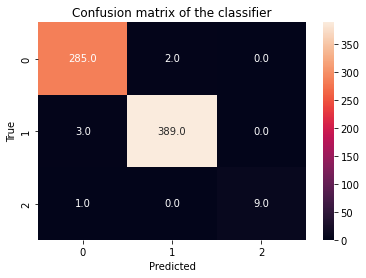

The accuracy of DT is 99.129173%
Precision/Recall/F1/Support:
(0.9936813600120354, 0.9617927658868425, 0.9768553527816989, None)
Participant: 4 
Total samples available: 8481            
Number of training samples: 7791 
Number of testing samples: 689 



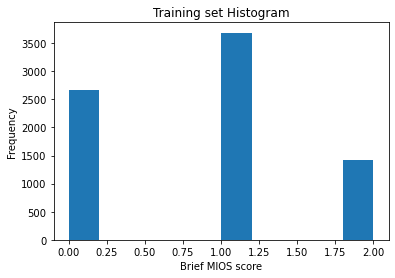

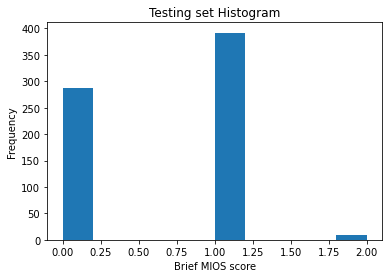

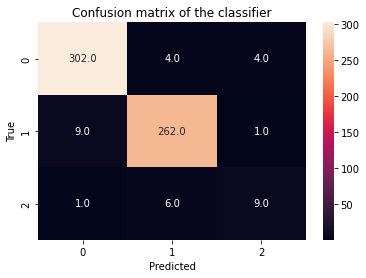

The accuracy of DT is 95.819398%
Precision/Recall/F1/Support:
(0.858013718307836, 0.833309614168248, 0.8447654624550786, None)
Participant: 5 
Total samples available: 8481            
Number of training samples: 7882 
Number of testing samples: 598 



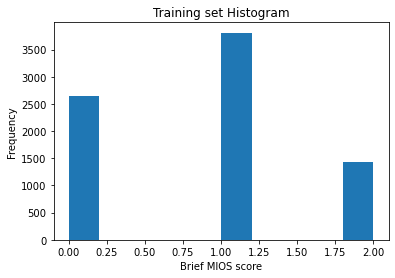

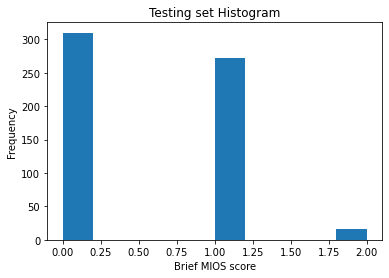

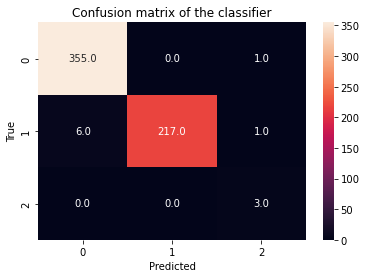

The accuracy of DT is 98.627787%
Precision/Recall/F1/Support:
(0.8611265004616806, 0.9886470037453184, 0.9081213610502313, None)
Participant: 6 
Total samples available: 8481            
Number of training samples: 7897 
Number of testing samples: 583 



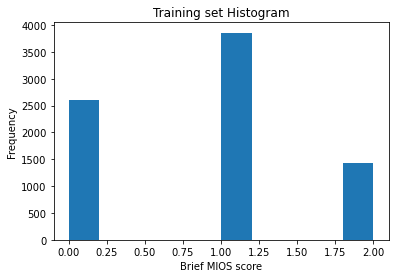

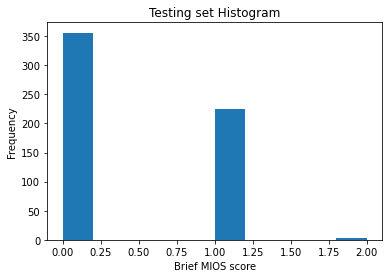

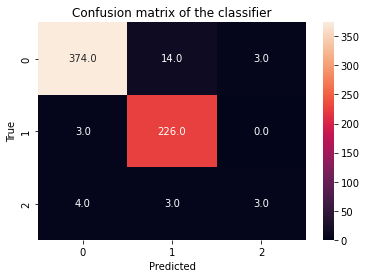

The accuracy of DT is 95.714286%
Precision/Recall/F1/Support:
(0.8038894829504336, 0.747807100816404, 0.7671796785808378, None)
Participant: 7 
Total samples available: 8481            
Number of training samples: 7850 
Number of testing samples: 630 



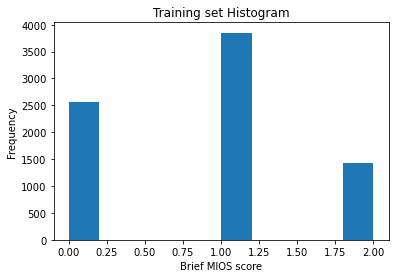

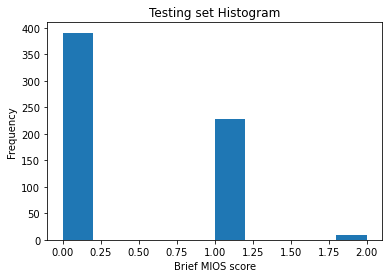

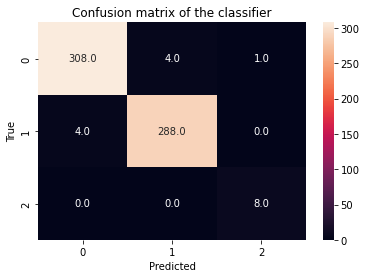

The accuracy of DT is 98.531811%
Precision/Recall/F1/Support:
(0.9541232486437966, 0.9901089763228149, 0.9710259468170831, None)
Participant: 8 
Total samples available: 8481            
Number of training samples: 7867 
Number of testing samples: 613 



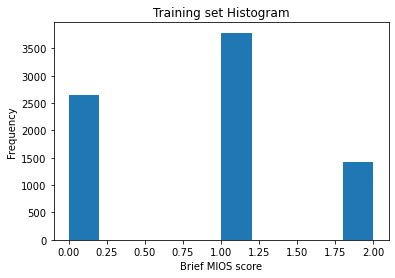

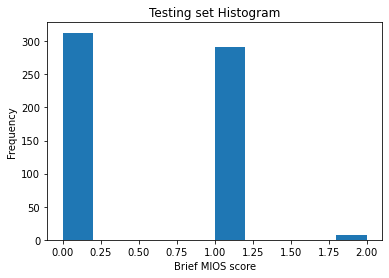

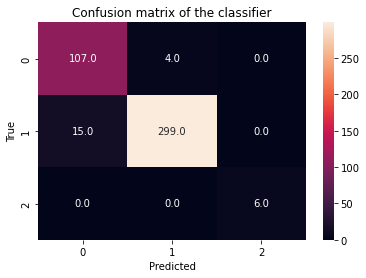

The accuracy of DT is 95.591647%
Precision/Recall/F1/Support:
(0.9546159533986186, 0.9720644211090071, 0.9625535901020909, None)
Participant: 9 
Total samples available: 8481            
Number of training samples: 8049 
Number of testing samples: 431 



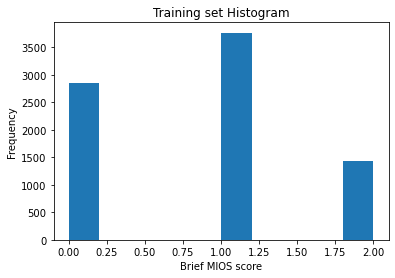

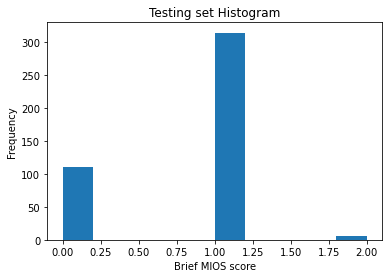

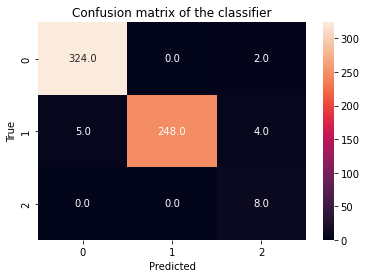

The accuracy of DT is 98.138748%
Precision/Recall/F1/Support:
(0.8520770010131713, 0.9862818584739762, 0.8995879740645819, None)
Participant: 10 
Total samples available: 8481            
Number of training samples: 7889 
Number of testing samples: 591 



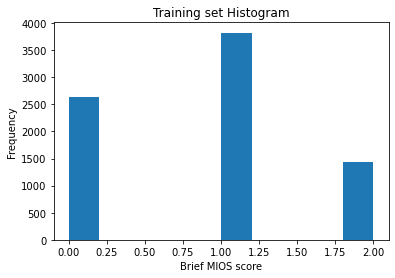

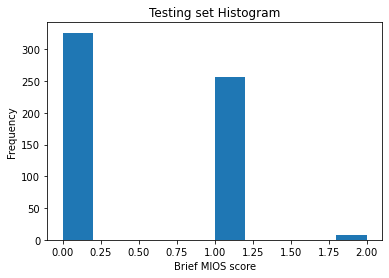

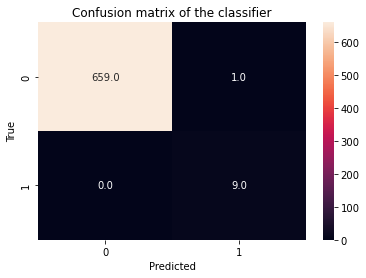

The accuracy of DT is 99.850523%
Precision/Recall/F1/Support:
(0.95, 0.9992424242424243, 0.9733051354694546, None)
Participant: 11 
Total samples available: 8481            
Number of training samples: 7811 
Number of testing samples: 669 



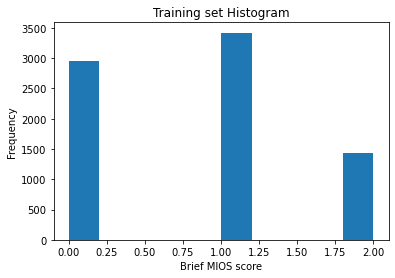

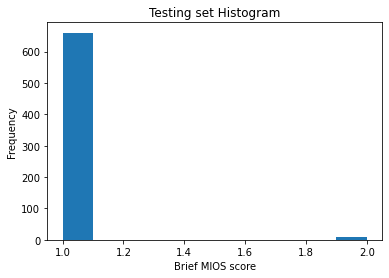

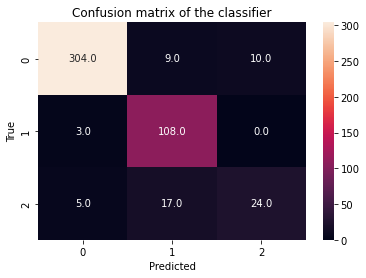

The accuracy of DT is 90.833333%
Precision/Recall/F1/Support:
(0.8287371588512941, 0.8119628579986636, 0.8130376560072848, None)
Participant: 12 
Total samples available: 8481            
Number of training samples: 8000 
Number of testing samples: 480 



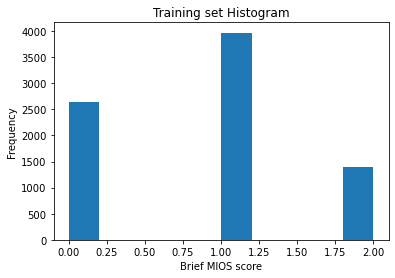

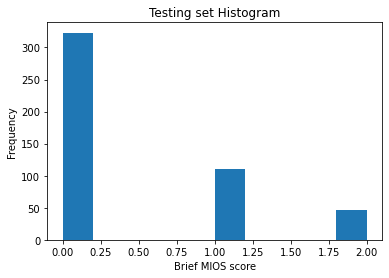

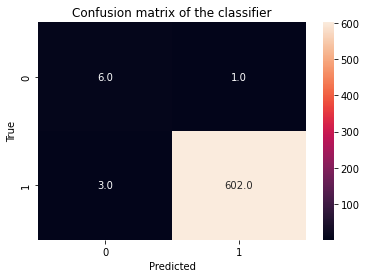

The accuracy of DT is 99.346405%
Precision/Recall/F1/Support:
(0.8325041459369817, 0.9260920897284534, 0.8733443708609272, None)
Participant: 13 
Total samples available: 8481            
Number of training samples: 7868 
Number of testing samples: 612 



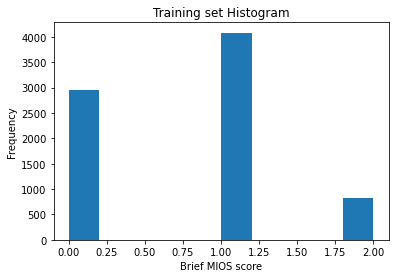

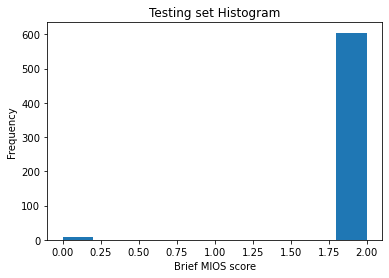

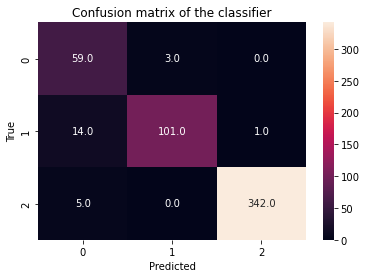

The accuracy of DT is 95.619048%
Precision/Recall/F1/Support:
(0.9082162168896862, 0.9359644454987343, 0.9174477696216826, None)
Participant: 14 
Total samples available: 8481            
Number of training samples: 7955 
Number of testing samples: 525 



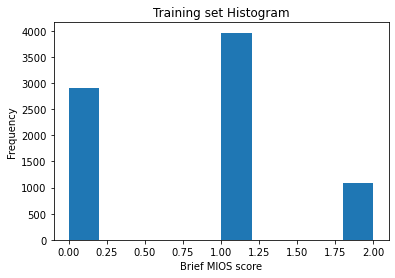

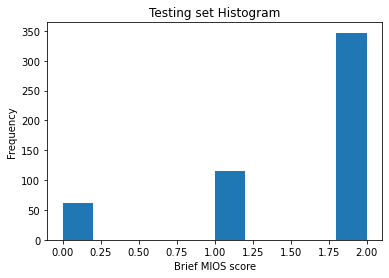

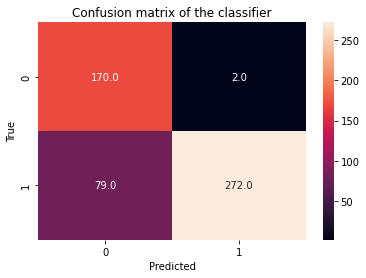

The accuracy of DT is 84.512428%
Precision/Recall/F1/Support:
(0.8377158268108933, 0.8816504339760154, 0.8390004750593825, None)
Participant: 15 
Total samples available: 8481            
Number of training samples: 7958 
Number of testing samples: 523 



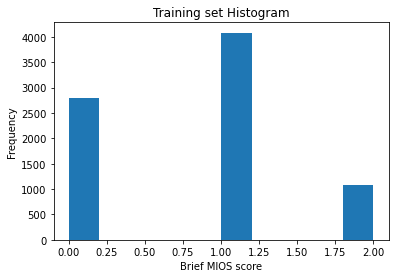

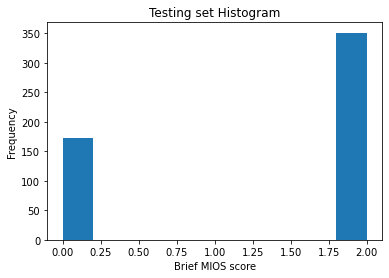

In [17]:
acc = np.zeros (n_participants)

for par_num in range (0, n_participants):

    start_train = n_samples_per_par [par_num]
    end_train = n_samples_per_par [par_num+1]

    X_train = np.vstack ((X[:start_train], X[end_train+1:]))
    y_train = np.hstack ((Y[:start_train], Y[end_train+1:]))

    X_test = X[start_train:end_train]
    y_test = Y[start_train:end_train]

    dt_acc = DT_prediction (X_train, y_train, X_test,y_test)
    histo_labels (par_num+1,ft_stacked,y_train,y_test)
    
    acc[par_num] = dt_acc

In [18]:
print ('Decision Tree: The average LOSO accuracy is %.2f +- %.2f' %(np.mean (acc)*100, np.std (acc)*100))

Decision Tree: The average LOSO accuracy is 96.40 +- 3.91


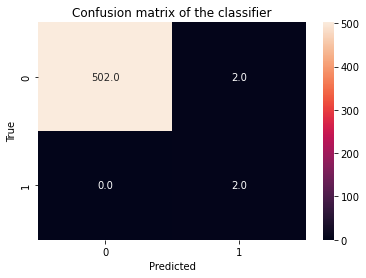

The accuracy of SVM is 99.604743%
Precision/Recall/F1/Support:
(0.75, 0.998015873015873, 0.832339297548045, None)
Participant: 1 
Total samples available: 8481            
Number of training samples: 7974 
Number of testing samples: 506 



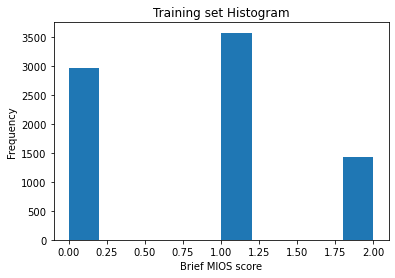

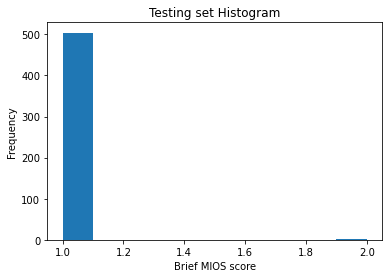

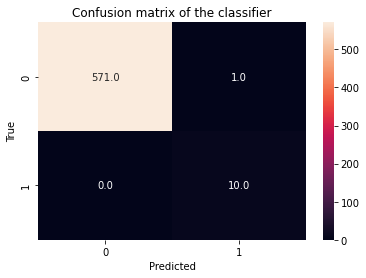

The accuracy of SVM is 99.828179%
Precision/Recall/F1/Support:
(0.9545454545454546, 0.9991258741258742, 0.9757530308711411, None)
Participant: 2 
Total samples available: 8481            
Number of training samples: 7898 
Number of testing samples: 582 



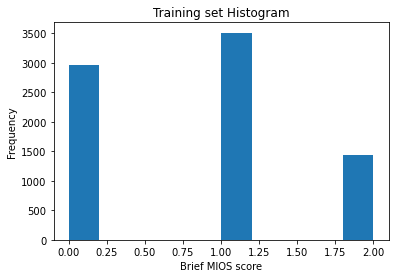

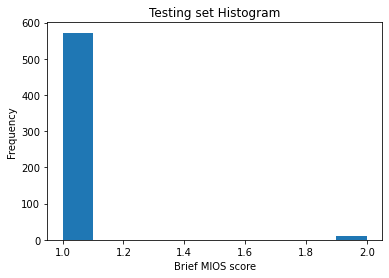

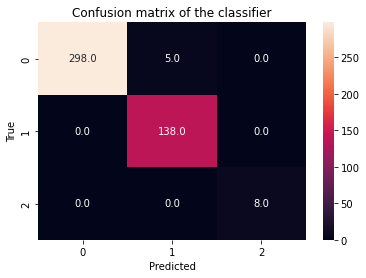

The accuracy of SVM is 98.886414%
Precision/Recall/F1/Support:
(0.9883449883449883, 0.9944994499449945, 0.9912956460466246, None)
Participant: 3 
Total samples available: 8481            
Number of training samples: 8031 
Number of testing samples: 449 



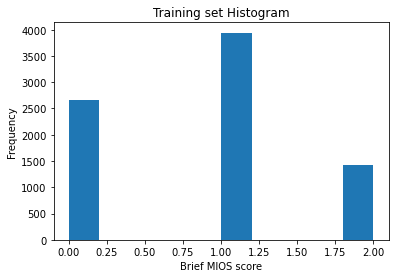

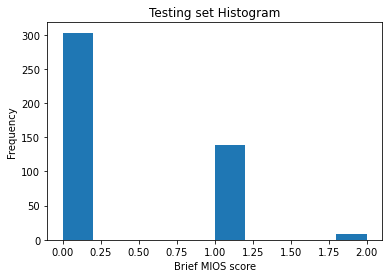

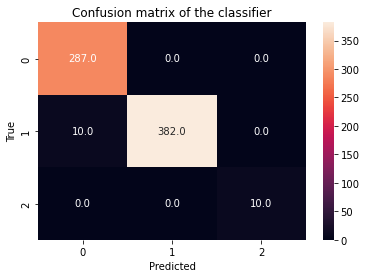

The accuracy of SVM is 98.548621%
Precision/Recall/F1/Support:
(0.988776655443322, 0.9914965986394558, 0.9899856052293133, None)
Participant: 4 
Total samples available: 8481            
Number of training samples: 7791 
Number of testing samples: 689 



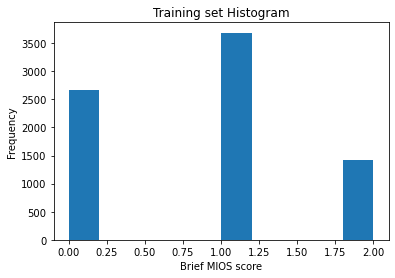

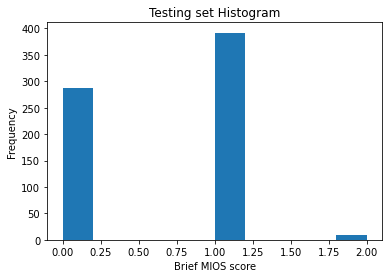

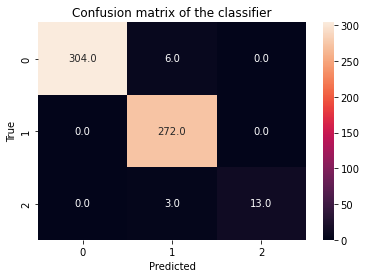

The accuracy of SVM is 98.494983%
Precision/Recall/F1/Support:
(0.9893238434163701, 0.9310483870967742, 0.9568349575970388, None)
Participant: 5 
Total samples available: 8481            
Number of training samples: 7882 
Number of testing samples: 598 



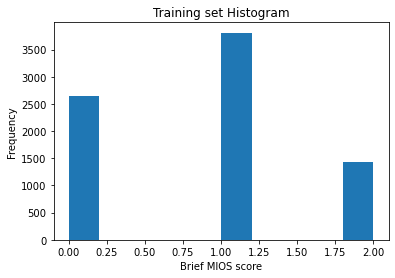

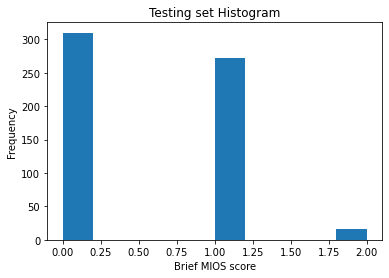

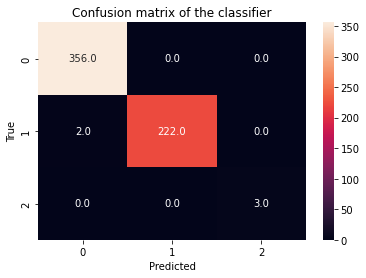

The accuracy of SVM is 99.656947%
Precision/Recall/F1/Support:
(0.9981378026070763, 0.9970238095238096, 0.9975715248730284, None)
Participant: 6 
Total samples available: 8481            
Number of training samples: 7897 
Number of testing samples: 583 



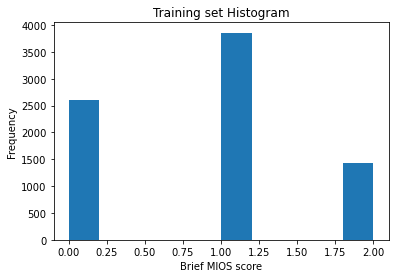

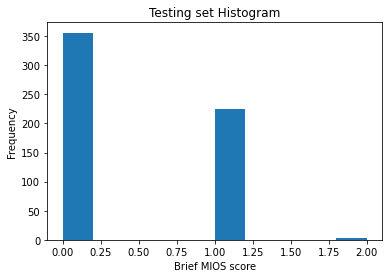

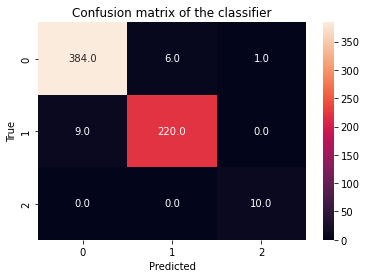

The accuracy of SVM is 97.460317%
Precision/Recall/F1/Support:
(0.9532138243885863, 0.9809319588856997, 0.9663352520495377, None)
Participant: 7 
Total samples available: 8481            
Number of training samples: 7850 
Number of testing samples: 630 



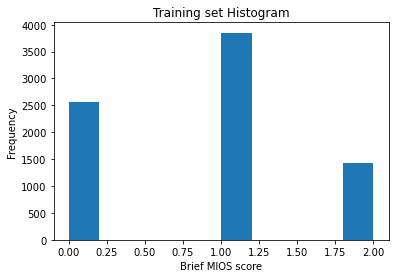

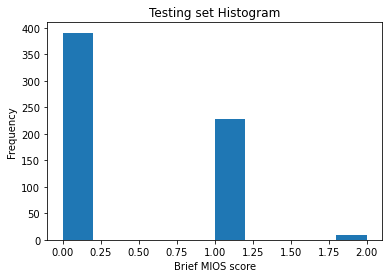

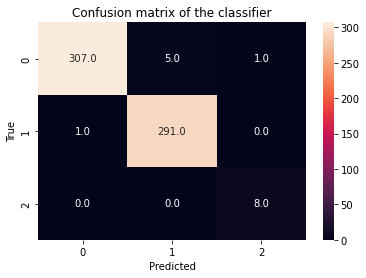

The accuracy of SVM is 98.858075%
Precision/Recall/F1/Support:
(0.9562500812500812, 0.992468671130757, 0.9732334157495526, None)
Participant: 8 
Total samples available: 8481            
Number of training samples: 7867 
Number of testing samples: 613 



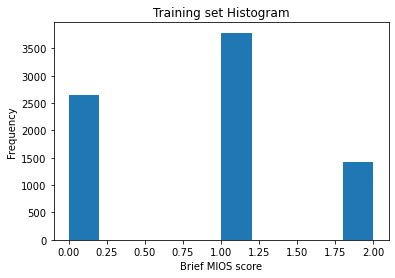

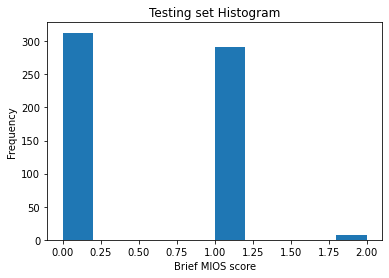

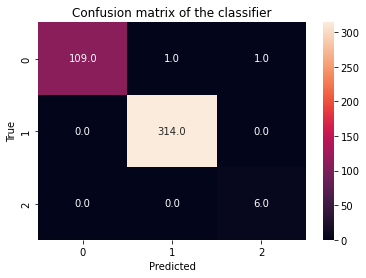

The accuracy of SVM is 99.535963%
Precision/Recall/F1/Support:
(0.9513227513227513, 0.993993993993994, 0.970798729622259, None)
Participant: 9 
Total samples available: 8481            
Number of training samples: 8049 
Number of testing samples: 431 



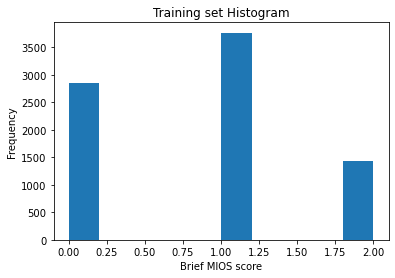

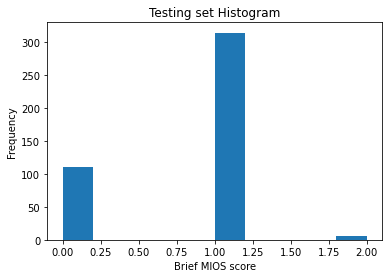

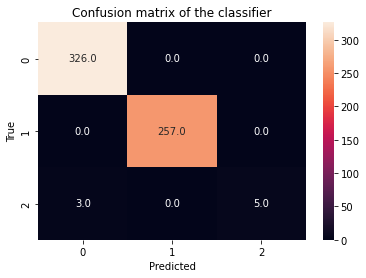

The accuracy of SVM is 99.492386%
Precision/Recall/F1/Support:
(0.9969604863221884, 0.875, 0.9215502055196713, None)
Participant: 10 
Total samples available: 8481            
Number of training samples: 7889 
Number of testing samples: 591 



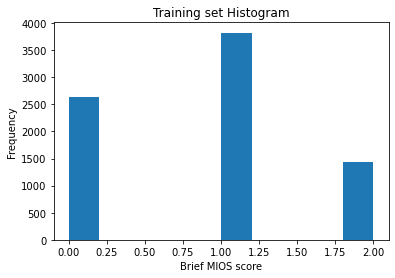

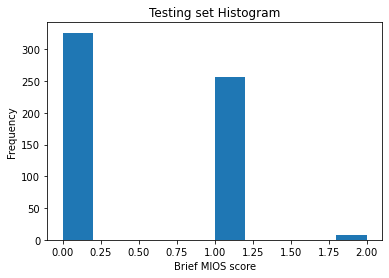

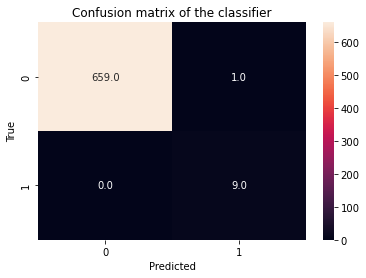

The accuracy of SVM is 99.850523%
Precision/Recall/F1/Support:
(0.95, 0.9992424242424243, 0.9733051354694546, None)
Participant: 11 
Total samples available: 8481            
Number of training samples: 7811 
Number of testing samples: 669 



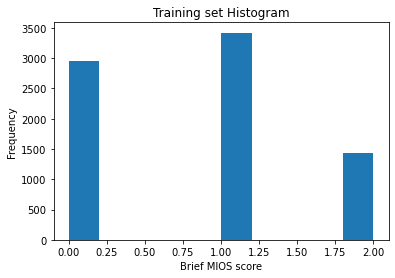

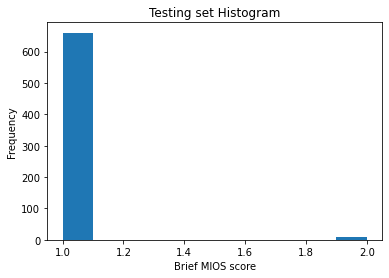

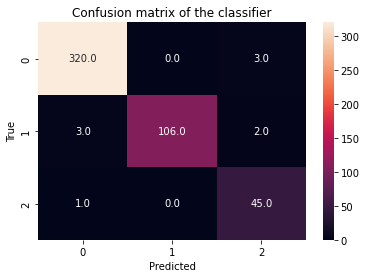

The accuracy of SVM is 98.125000%
Precision/Recall/F1/Support:
(0.962551440329218, 0.9746426329411926, 0.9678797866556504, None)
Participant: 12 
Total samples available: 8481            
Number of training samples: 8000 
Number of testing samples: 480 



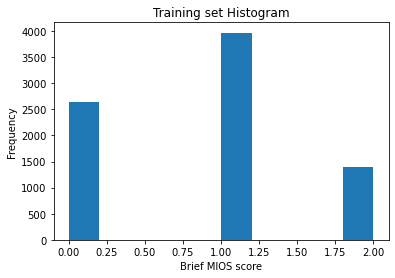

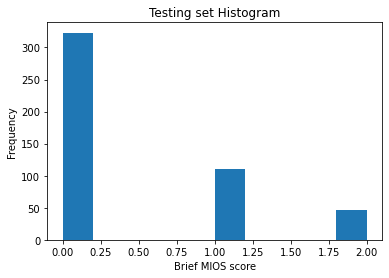

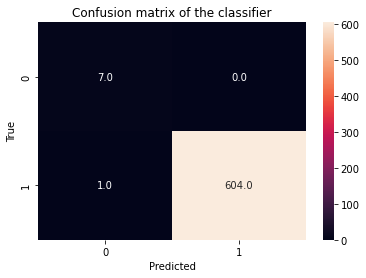

The accuracy of SVM is 99.836601%
Precision/Recall/F1/Support:
(0.9375, 0.9991735537190083, 0.9662531017369727, None)
Participant: 13 
Total samples available: 8481            
Number of training samples: 7868 
Number of testing samples: 612 



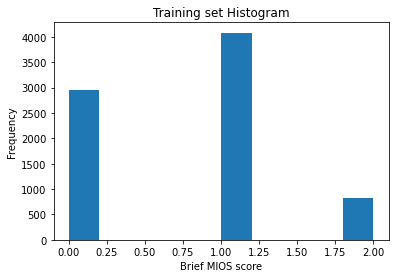

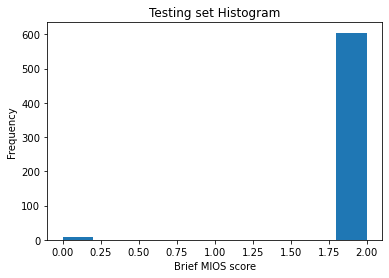

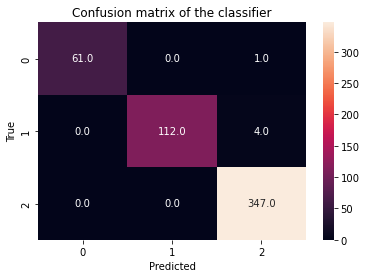

The accuracy of SVM is 99.047619%
Precision/Recall/F1/Support:
(0.9952651515151515, 0.9831294030404153, 0.98905766107582, None)
Participant: 14 
Total samples available: 8481            
Number of training samples: 7955 
Number of testing samples: 525 



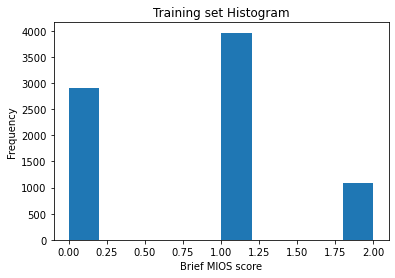

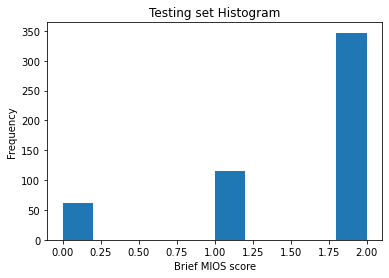

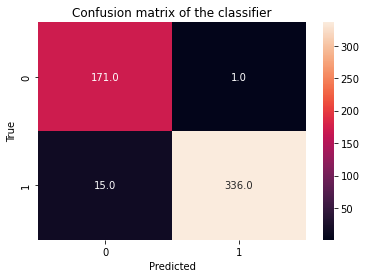

The accuracy of SVM is 96.940727%
Precision/Recall/F1/Support:
(0.9581937398296161, 0.9757255018882927, 0.966025724308172, None)
Participant: 15 
Total samples available: 8481            
Number of training samples: 7958 
Number of testing samples: 523 



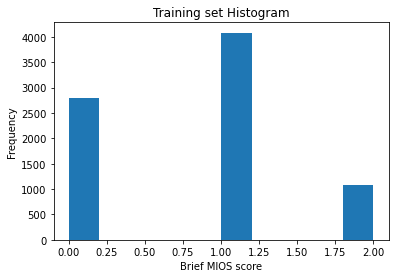

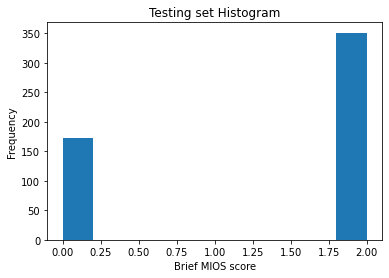

In [19]:
acc = np.zeros (n_participants)

for par_num in range (0, n_participants):

    start_train = n_samples_per_par [par_num]
    end_train = n_samples_per_par [par_num+1]

    X_train = np.vstack ((X[:start_train], X[end_train+1:]))
    y_train = np.hstack ((Y[:start_train], Y[end_train+1:]))

    X_test = X[start_train:end_train]
    y_test = Y[start_train:end_train]

    svm_acc = SVM_prediction (X_train, y_train, X_test,y_test)
    histo_labels (par_num+1,ft_stacked,y_train,y_test)
    
    acc[par_num] = svm_acc

In [20]:
print ('SVM: The average LOSO accuracy is %.2f +- %.2f' %(np.mean (acc)*100, np.std (acc)*100))

SVM: The average LOSO accuracy is 98.94 +- 0.87


In [21]:
from sklearn.metrics import precision_score

clf = SVC(gamma='scale', class_weight='balanced')
clf.fit(X_train, y_train) # Create SVM model based on default settings
y_pred = clf.predict (X_test) # SVM prediction for test values
precision_score(y_test, y_pred, average='weighted')


from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred, labels=[1, 2, 3]))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00         0
           2       1.00      0.96      0.98       351
           3       0.00      0.00      0.00         0

   micro avg       1.00      0.96      0.98       351
   macro avg       0.33      0.32      0.33       351
weighted avg       1.00      0.96      0.98       351



/opt/homebrew/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/python3.

# Label cut-off

In [22]:
print (np.max(np.hstack ((label))[Y==0]))
print (np.max(np.hstack ((label))[Y==1]))
print (np.max(np.hstack ((label))[Y==2]))
print (np.min(np.hstack ((label))[Y==0]))
print (np.min(np.hstack ((label))[Y==1]))
print (np.min(np.hstack ((label))[Y==2]))

32.0
32.0
32.0
0.0
0.0
0.0


In [23]:
print (np.mean(np.hstack ((label))[Y==0]))
print (np.mean(np.hstack ((label))[Y==1]))
print (np.mean(np.hstack ((label))[Y==2]))

12.927389395474503
12.647390345503553
11.868658790826963


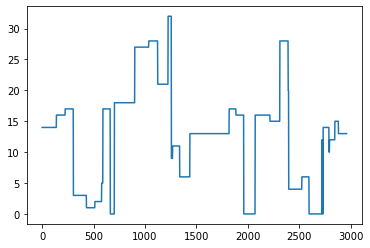

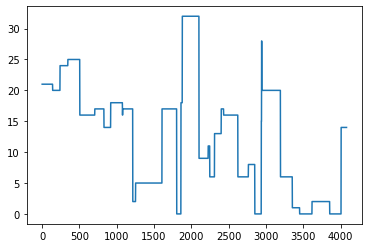

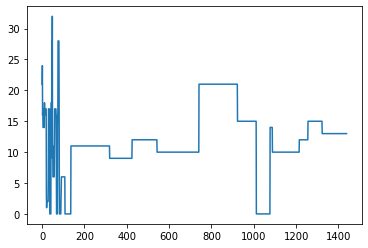

In [24]:
plt.figure()
plt.plot (np.hstack ((label))[Y==0])
plt.figure()
plt.plot (np.hstack ((label))[Y==1])
plt.figure()
plt.plot (np.hstack ((label))[Y==2])

## TSNE Test

In [47]:
from sklearn.manifold import TSNE
import pandas as pd
import seaborn as sns

In [81]:
# Change the class names for the TSNE plots

def class_name_change (y_test):
    y_test_tsne = ["" for x in range(len(y_test))]

    true_locations_0 = np.where([y_test==0])[1]
    true_locations_1 = np.where([y_test==1])[1]
    true_locations_2 = np.where([y_test==2])[1]

    for i in true_locations_0:
        y_test_tsne[i] = 'Class 0'

    for i in true_locations_1:
        y_test_tsne[i] = 'Class 1'

    for i in true_locations_2:
        y_test_tsne[i] = 'Class 2'
        
    return (y_test_tsne)

/opt/homebrew/anaconda3/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/opt/homebrew/anaconda3/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


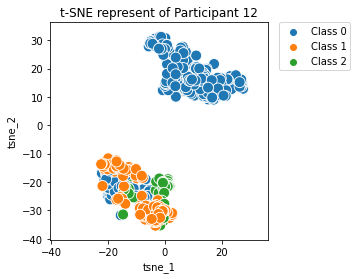

In [121]:
# Choosing participant number

par_num = 11
start_train = n_samples_per_par [par_num]
end_train = n_samples_per_par [par_num+1]

X_test = X[start_train:end_train]
y_test = Y[start_train:end_train]

y_test_tsne = class_name_change (y_test)

if (par_num == 13):
    # Participant 14
    # Swap classes to have order class 0 1 2
    y_test_tsne
    a, b, c, d = 281, 288, 0, 1
    # Class 0 to first spot
    y_test_tsne[a], y_test_tsne[c] = y_test_tsne[c], y_test_tsne[a] 
    # Class 1 to second spot
    y_test_tsne[b], y_test_tsne[d] = y_test_tsne[d], y_test_tsne[b]
    
elif (par_num == 11):
    # Participant 12
    # Swap classes to have order class 0 1 2
    y_test_tsne
    a, b, c, d = 2, 337, 128, 1
    # Class 1 to second spot
    y_test_tsne[b], y_test_tsne[d] = y_test_tsne[d], y_test_tsne[b] 
    # Class 2 to second spot
    y_test_tsne[c], y_test_tsne[a] = y_test_tsne[a], y_test_tsne[c]

# We want to get TSNE embedding with 2 dimensions
n_components = 2
tsne = TSNE(n_components)
tsne_result = tsne.fit_transform(X_test)
tsne_result.shape
 
# Plot the result of our TSNE with the label color coded
# A lot of the stuff here is about making the plot look pretty and not TSNE
tsne_result_df = pd.DataFrame({'tsne_1': tsne_result[:,0], 'tsne_2': tsne_result[:,1], 'label': y_test_tsne})

fig, ax = plt.subplots(1)
sns.scatterplot(x='tsne_1', y='tsne_2', hue='label', data=tsne_result_df, ax=ax,s=120)
lim = (tsne_result.min()-5, tsne_result.max()+5)
ax.set_xlim(lim)
ax.set_ylim(lim)
ax.set_aspect('equal')
ax.set_title ("t-SNE represent of Participant %d" %(par_num+1))
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.0)

# Ablation Test

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, shuffle=True, random_state=60)

# For ablation test
# MIOS class labels of 0, 1, and 2
y_test_ablation = np.random.randint (0,3,size = len (y_test)) 

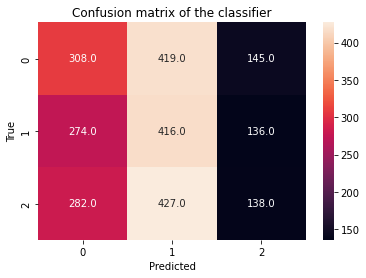

The accuracy of DT is 33.870334%
Precision/Recall/F1/Support:
(0.338490863093658, 0.33992365051439705, 0.32377187376686556, None)
Participant: 14 
Total samples available: 8481            
Number of training samples: 5936 
Number of testing samples: 2545 



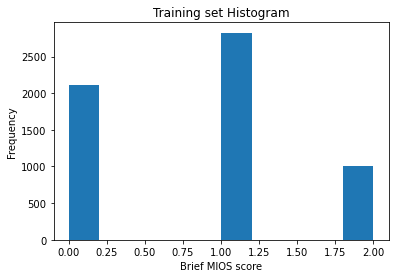

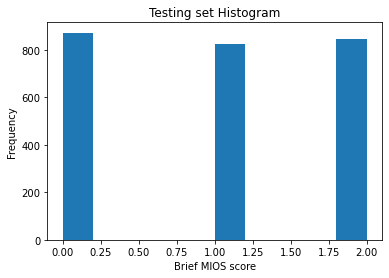

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, shuffle=True, random_state=60)

DT_prediction (X_train, y_train, X_test,y_test_ablation)

histo_labels (par_num,ft_stacked,y_train,y_test_ablation)

# Removal of top features Ablation

In [27]:
for i in range (0,len(feats[0])):
    print ('Index %d: %s' %(i, feats[0][i]))

Index 0: ['Var local--RI']
Index 1: ['Var local--PPG']
Index 2: ['Var local--ECG']
Index 3: ['Var local--GSR']
Index 4: ['Var local--ECG\\_PR']
Index 5: ['Var local--ECG\\_RR']
Index 6: ['Var local--Respiration\\_Rate']
Index 7: ['Var local--Respiration\\_Rate\\_elevated']
Index 8: ['Mean local--RI']
Index 9: ['Mean local--PPG']
Index 10: ['Mean local--ECG']
Index 11: ['Mean local--GSR']
Index 12: ['Mean local--ECG\\_PR']
Index 13: ['Mean local--ECG\\_RR']
Index 14: ['Mean local--Respiration\\_Rate']
Index 15: ['Mean local--Respiration\\_Rate\\_elevated']
Index 16: ['RMMSD']
Index 17: ['LF']
Index 18: ['HF']
Index 19: ['VLF']
Index 20: ['HF/LF']


## Remove top features 

- Mean - RI
- Mean - GSR
- Mean - Variance PR 
- Mean - ECG RR Interval

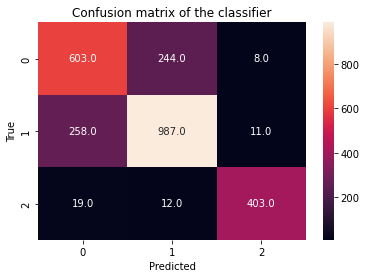

The accuracy of DT is 78.310413%
Precision/Recall/F1/Support:
(0.8114167457827023, 0.8065542039812907, 0.8088685386621993, None)
Participant: 14 
Total samples available: 8481            
Number of training samples: 5936 
Number of testing samples: 2545 



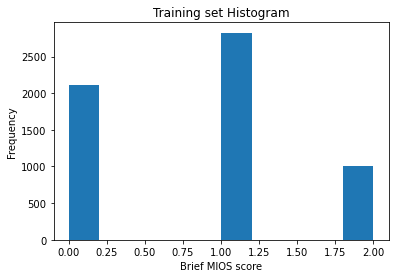

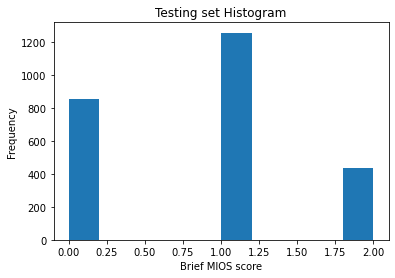

In [28]:
X_reduced = np.delete(X, [8,11,13,4],1)
Y_reduced = Y

X_train, X_test, y_train, y_test = train_test_split(X_reduced, Y_reduced, test_size=0.3, shuffle=True, random_state=60)

DT_prediction (X_train, y_train, X_test,y_test)

histo_labels (par_num,ft_stacked,y_train,y_test)

# Weighted testing

In [29]:
# Cluster 1: 2961 Cluster 2: 4081 Cluster 3: 1439
weights = {0:5520, 1:4400, 2:7042}

## SVM 

In [30]:
clf = svm.SVC(gamma='scale', class_weight=weights)
clf.fit(X_train, y_train) 
y_pred = clf.predict (X_test)
acc = accuracy_score(y_test, y_pred)
print (acc)


0.787426326129666


In [31]:
clf = SVC(gamma='scale', class_weight='balanced')
clf.fit(X_train, y_train) 
y_pred = clf.predict (X_test)
acc = accuracy_score(y_test, y_pred)
print (acc)


0.6455795677799607


## DT

In [32]:
clf = DecisionTreeClassifier(class_weight='balanced', ccp_alpha=0.0) # Load-up of DT ML methodology using default setting
clf.fit(X_train, y_train) # Create DT model based on default setting
y_pred = clf.predict (X_test) # DT prediction for test values
acc = accuracy_score(y_test, y_pred) #Accuracy of the model
print (acc)

0.7838899803536346


In [33]:
clf = DecisionTreeClassifier(class_weight=weights, ccp_alpha=0.0) # Load-up of DT ML methodology using default setting
clf.fit(X_train, y_train) # Create DT model based on default setting
y_pred = clf.predict (X_test) # DT prediction for test values
acc = accuracy_score(y_test, y_pred) #Accuracy of the model
print (acc)

0.7976424361493124


# Downsampling class 2

In [34]:
# Cluster 1: 2961 Cluster 2: 4081 Cluster 3: 1439

In [35]:
X_c1 = X[Y==0][0:1439]
X_c2 = X[Y==1][0:1439]
X_c3 = X[Y==2][0:1439]
Y_c1 = Y[Y==0][0:1439]
Y_c2 = Y[Y==1][0:1439]
Y_c3 = Y[Y==2][0:1439]


In [36]:
X_downsample = np.vstack((X_c1,X_c2,X_c3))
Y_downsample = np.hstack((Y_c1,Y_c2,Y_c3))

Participant: 14 
Total samples available: 8481            
Number of training samples: 3021 
Number of testing samples: 1296 



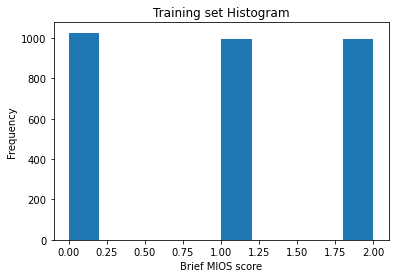

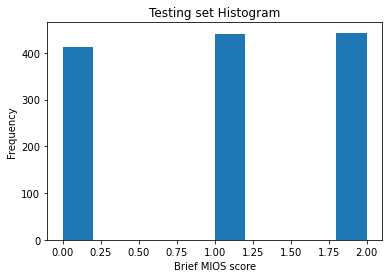

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X_downsample, Y_downsample, test_size=0.3, shuffle=True, random_state=60)

histo_labels (par_num,ft_stacked,y_train,y_test)

In [38]:
clf = DecisionTreeClassifier(class_weight='balanced', ccp_alpha=0.0) # Load-up of DT ML methodology using default setting
clf.fit(X_train, y_train) # Create DT model based on default setting
y_pred = clf.predict (X_test) # DT prediction for test values
acc = accuracy_score(y_test, y_pred) #Accuracy of the model
print (acc)

0.9837962962962963


In [39]:
clf = SVC(gamma='scale', class_weight='balanced')
clf.fit(X_train, y_train) 
y_pred = clf.predict (X_test)
acc = accuracy_score(y_test, y_pred)
print (acc)


0.9868827160493827


# SMOTE

In [40]:
from imblearn.over_sampling import SMOTE

# transform the dataset
oversample = SMOTE()
X, y = oversample.fit_resample(X, Y)

In [41]:
# define model
from sklearn.model_selection import RepeatedStratifiedKFold
model = DecisionTreeClassifier()
# evaluate pipeline
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_val_score(model, X, y, scoring='roc_auc', cv=cv, n_jobs=-1)

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True, random_state=60)

clf = DecisionTreeClassifier(class_weight='balanced', ccp_alpha=0.0) # Load-up of DT ML methodology using default setting
clf.fit(X_train, y_train) # Create DT model based on default setting
y_pred = clf.predict (X_test) # DT prediction for test values
acc = accuracy_score(y_test, y_pred) #Accuracy of the model
print (acc)

0.9828478083310646


/opt/homebrew/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/homebrew/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/opt/homebrew/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 103, in __call__
    score = scorer._score(cached_call, estimator, *args, **kwargs)
  File "/opt/homebrew/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 349, in _score
    raise ValueError("{0} format is not supported".format(y_type))
ValueError: multiclass format is not supported

  warnings.warn(
/opt/homebrew/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition

/opt/homebrew/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/homebrew/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/opt/homebrew/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 103, in __call__
    score = scorer._score(cached_call, estimator, *args, **kwargs)
  File "/opt/homebrew/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 349, in _score
    raise ValueError("{0} format is not supported".format(y_type))
ValueError: multiclass format is not supported

  warnings.warn(
/opt/homebrew/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition

/opt/homebrew/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/homebrew/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/opt/homebrew/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 103, in __call__
    score = scorer._score(cached_call, estimator, *args, **kwargs)
  File "/opt/homebrew/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 349, in _score
    raise ValueError("{0} format is not supported".format(y_type))
ValueError: multiclass format is not supported

  warnings.warn(
/opt/homebrew/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition